# Simple Regression Modeling with Boston Housing dataset - Lab

In this final lab, we shall apply the regression analysis and diagnostics techniques covered in this section to a familiar "Boston Housing" dataset. We performed a detailed EDA for this dataset in earlier section and hence carry a good understanding of how this dataset is composed. This this lab we shall try to identify the predictive ability of some of features found in this dataset towards identifying house price. 

### Objectives:
You will be able to:
* Build many linear models with boston housing data set using OLS
* For each model, analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

Let's get started. 

### Import necessary libraries and load 'BostonHousing.csv' as pandas dataframe.

In [34]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import scipy.stats as stats
plt.style.use('seaborn')
plt.ion()

The data features and target are present as columns in boston data. Boston data gives a set of independent as independent variables in data and the housing rate as `MEDV` in target property. Also feature names are listed in feature_names. The desription is available at [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [2]:
# Your code here
df = pd.read_csv('BostonHousing.csv');
print(df.head())
print(df.info())
print(df.describe())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad       

#### Record your observations here 
Apart from Chas, Rad, and Tax, all other series are continuous. Since each datum is the average of each town's data, I expect at least some of the data to be fairly normally distributed. 

### Create histograms for all variables in the dataset and comment on their shape (uniform or not ?)

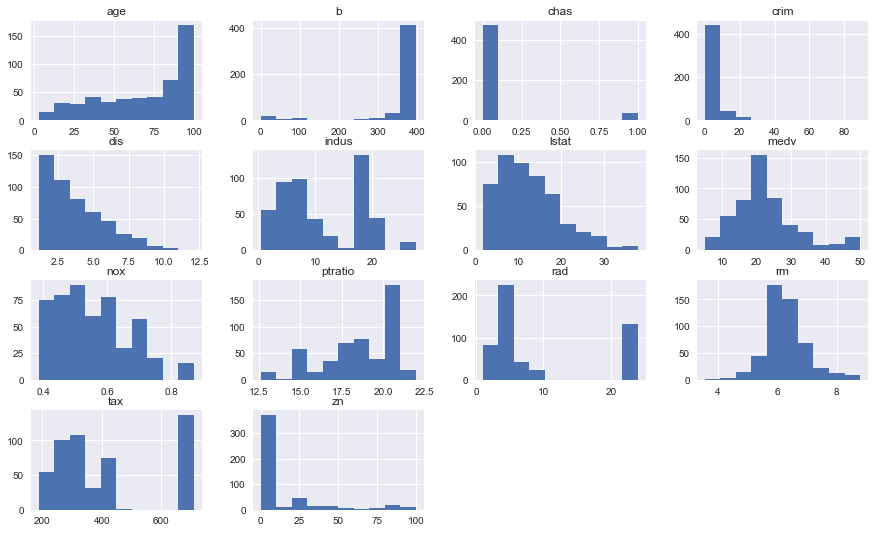

In [3]:
# Your code here 
df.hist(figsize = (15,9));

#### You observations here 
Far fewer series are normally distributed than I expected, but some certainly are. Rm, medv, and lstat have the characteristic shape of a normal distribution. rad appears to be somewhat normally distributed, though it has a large second peak far away from the first peak. rm could also be normally distributed, though it has high kurtosis and is skewed right (positive).

Based on this , we shall choose a selection of features which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

So much for choice! Regardless of my interpretation, I'll be using the above series.

In [11]:
# Your code here
df_pred = df[['crim', 'dis', 'rm', 'zn', 'age', 'medv']]
df_pred.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check for linearity assumption for all chosen features with target variable using scatter plots and comment on the results

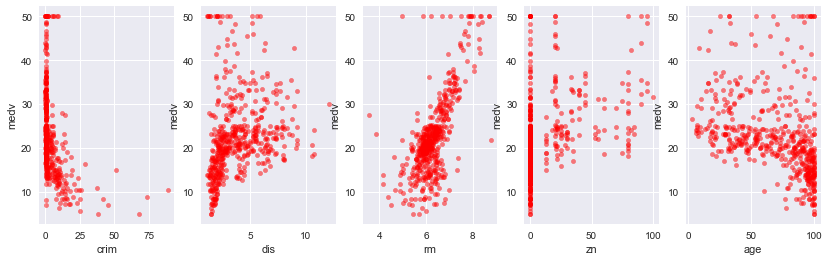

In [14]:
# Your code here
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(14,4))

for xcol, ax in zip(['crim', 'dis', 'rm', 'zn', 'age'], axes):
    df_pred.plot(kind='scatter', x=xcol, y='medv', ax=ax, alpha=0.5, color='r')

#### Your observations here
I'll just repeat what was said below....

The data needs a hell of a lot of processing. There is correlation in a few of the graphs, but some of them center too close to one particular number, making it difficult to interpret what's going on.

Okie so obviously our data needs a lot of pre-procesing to improve the results. This key behind such kaggle competitions is to process the data in such a way that we can identify the relationships and make predictions in the best possible way. For now, we shall leave the dataset untouched and just move on with regression. So far, our assumptions, although not too strong, but still hold to a level that we can move on. 

### Let's do Regression 

Right here is the real deal. Let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). We shall do this is a loop and in every iteration, we shall pick one of the independent variables  perform following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`.
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

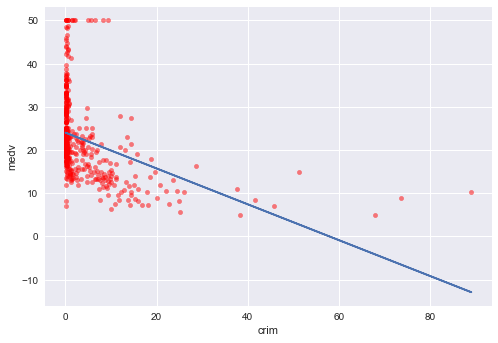

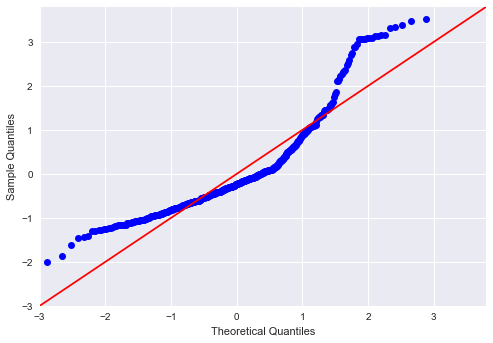

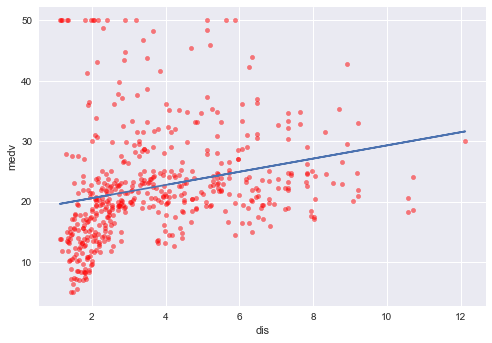

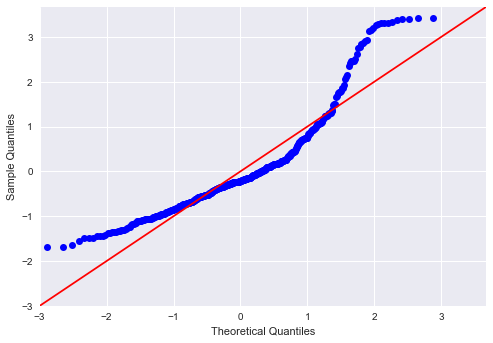

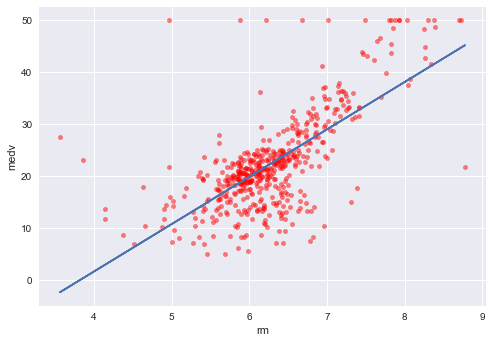

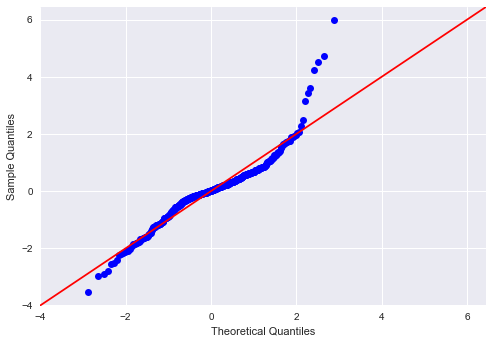

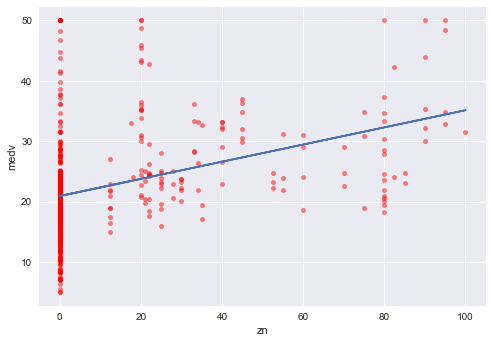

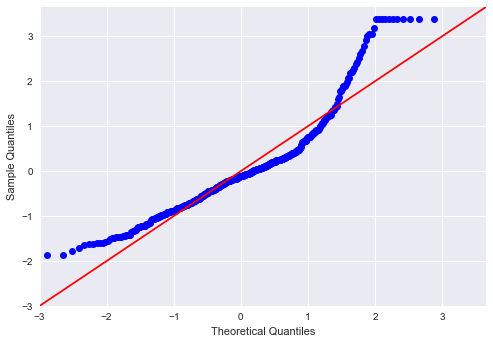

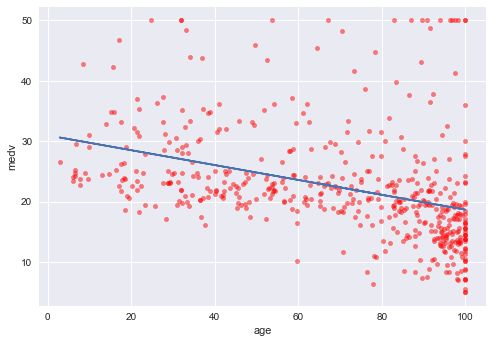

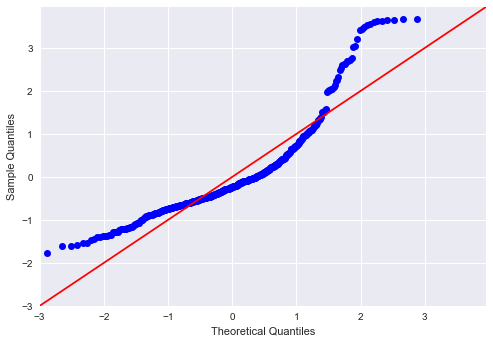

,IV,R Squared,Intercept,Slope,P-Value,Normality (JB)
0,crim,0.150780,24.033106,-0.415190,1.173987e-19,295.403720
1,dis,0.062464,18.390088,1.091613,1.206612e-08,305.104165
2,rm,0.483525,-34.670621,9.102109,2.487229e-74,612.448985
3,zn,0.129921,20.917579,0.142140,5.713584e-17,262.387500
4,age,0.142095,30.978678,-0.123163,1.569982e-18,456.983434


In [37]:
# Your code here
IV=[]
r_squared=[]
intercept=[]
slope=[]
p_value=[]
normality=[]

for xcol in ['crim', 'dis', 'rm', 'zn', 'age']:
    # Run the regression model
    f = 'medv~'+xcol
    model = ols(formula=f, data=df).fit()
    IV.append(xcol)
    r_squared.append(model.rsquared)
    intercept.append(model.params[0])
    slope.append(model.params[1])
    p_value.append(model.f_pvalue)
    test = sms.jarque_bera(model.resid)
    normality.append(test[0])
    
    #plot graphics
    df_pred.plot(kind='scatter', x=xcol, y='medv', alpha=0.5, color='r')
    plt.plot(df_pred[xcol],model.predict(df_pred[xcol])) # This was a powerful bit of code
    sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    plt.show()
df_results = pd.DataFrame({'IV':IV,'R Squared':r_squared,'Intercept':intercept,'Slope':slope,'P-Value':p_value,'Normality (JB)':normality})
df_results

In [ ]:
#Your obervations here 


So clearly the results are not highly reliable. the best good of fit i.e. r-squared is witnessed with `rm`. So clearly in this analysis this is our best predictor. 

---
#### So how can we improve upon these results . 
1. Pre-Processing 

This is where pre-processing of data comes in. Dealing with outliers, normalizing data, scaling values etc can help regression analysis get more meaningful results from the given set of data 

2. Advanced Analytical Methods

Simple regression is a very basic analysis techniques and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. In the next section we shall look at multiple regression where we can use multiple features **AT ONCE** to define a relationship with outcome. We shall also look at some pre-processing and data simplification techniques and re-visit the boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the the goodness of fit. 
![](https://i.pinimg.com/originals/e5/a5/1e/e5a51eff1b2133105ebaa9b779106ae2.png)

## Summary 

In this lab, we attempted to bring in all the skills learnt so far to a slighlt detailed dataset. We looked at the outcome of our analysis and realized that the data might need some pre-processing to see a clear improvement in results. We shall pick it up in the next section from this point and bring in data pre-processing techniques along with some assumptions that are needed for multiple regression . 